# 로지스틱 회귀

## 데이터 준비

In [ ]:
import pandas as pd

In [ ]:
fish = pd.read_csv('fish_data.csv')
fish.head()

Species  Weight  Length  Diagonal   Height   Width
0   Bream   242.0    25.4      30.0  11.5200  4.0200
1   Bream   290.0    26.3      31.2  12.4800  4.3056
2   Bream   340.0    26.5      31.1  12.3778  4.6961
3   Bream   363.0    29.0      33.5  12.7300  4.4555
4   Bream   430.0    29.0      34.0  12.4440  5.1340

In [ ]:
fish.describe()

Weight      Length    Diagonal      Height       Width
count   159.000000  159.000000  159.000000  159.000000  159.000000
mean    398.326415   28.415723   31.227044    8.970994    4.417486
std     357.978317   10.716328   11.610246    4.286208    1.685804
min       0.000000    8.400000    8.800000    1.728400    1.047600
25%     120.000000   21.000000   23.150000    5.944800    3.385650
50%     273.000000   27.300000   29.400000    7.786000    4.248500
75%     650.000000   35.500000   39.650000   12.365900    5.584500
max    1650.000000   63.400000   68.000000   18.957000    8.142000

In [ ]:
print(fish['Species'])

0      Bream
1      Bream
2      Bream
3      Bream
4      Bream
       ...  
154    Smelt
155    Smelt
156    Smelt
157    Smelt
158    Smelt
Name: Species, Length: 159, dtype: object


In [ ]:
import numpy as np

In [ ]:
fish.columns

Index(['Species', 'Weight', 'Length', 'Diagonal', 'Height', 'Width'], dtype='object')

In [ ]:
print(np.unique(fish['Species']))

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [ ]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']]

In [ ]:
print(fish_input.shape, fish_input)

(159, 5)      Weight  Length  Diagonal   Height   Width
0     242.0    25.4      30.0  11.5200  4.0200
1     290.0    26.3      31.2  12.4800  4.3056
2     340.0    26.5      31.1  12.3778  4.6961
3     363.0    29.0      33.5  12.7300  4.4555
4     430.0    29.0      34.0  12.4440  5.1340
..      ...     ...       ...      ...     ...
154    12.2    12.2      13.4   2.0904  1.3936
155    13.4    12.4      13.5   2.4300  1.2690
156    12.2    13.0      13.8   2.2770  1.2558
157    19.7    14.3      15.2   2.8728  2.0672
158    19.9    15.0      16.2   2.9322  1.8792

[159 rows x 5 columns]


In [ ]:
fish_input = fish_input.to_numpy()
print(fish_input)

In [ ]:
fish_input = fish.iloc[:, 1:].to_numpy()

In [ ]:
print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [ ]:
fish_target = fish['Species'].to_numpy()
print(fish_target)

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42
)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [ ]:
print(train_scaled.shape, train_scaled)

## 로지스틱 회귀


## $$ z = a \times weight + b \times length + c \times diagonal + d \times height + e \times width + f $$
## $$z= ax_0 + bx_1 + cx_2 + dx_3 + ex_4 + fx_5 + g $$ 

## $$z= w_0x_0 + w_1x_1 + w_2x_2 + w_3x_3 + w_4x_4 + w_5x_5 + b $$


## Sigmoid
## $$ \theta = \frac {1}{ 1+e^{-z}} $$


In [ ]:
import matplotlib.pyplot as plt

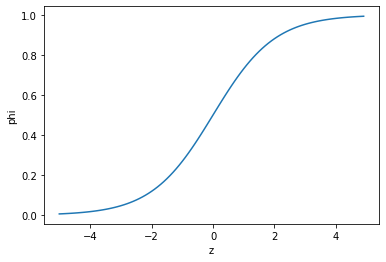

In [ ]:
z = np.arange(-5, 5, 0.1)
phi = 1/(1+np.exp(-z))
plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

In [ ]:
char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
print(char_arr[[True, False, True, False, False]])

['A' 'C']


# 로지스틱 회귀를 이용한 이진 분류

In [ ]:
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
print(bream_smelt_indexes)

[ True False  True False False False False  True False False False  True
 False False False  True  True False False  True False  True False False
 False  True False False  True False False False False  True False False
  True  True False False False False False  True False False False False
 False  True False  True False False  True False False False  True False
 False False False False False  True False  True False False False False
 False False False False False  True False  True False False  True  True
 False False False  True False False False False False  True False False
 False  True False  True False False  True  True False False False False
 False False False False  True  True False False  True False False]


In [ ]:
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

print(train_bream_smelt.shape, target_bream_smelt.shape)

(33, 5) (33,)


In [ ]:
from sklearn.linear_model import  LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [ ]:
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


## 로지스틱 회귀 계수 확인

In [ ]:
print(lr.coef_)
print(lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]]
[-2.16155132]


In [ ]:
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


## $$-{(y\log(p) + (1 - y)\log(1 - p))} $$


In [ ]:
from scipy.special import expit
print(expit(decisions))

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


# 로지스틱 회귀로 다중 분류 수행하기


###  이진 분류기를 활용하여 다중 클래스 분류 가능
    * 일대다(OvR 또는 OvA)
    * 일대일(OvO)

### 일대다 방식 활용 예제
    * 숫자 5 예측하기에서 사용했던 이진 분류 방식을 동일하게 모든 숫자에 대해서 실행
    * 각 샘플에 대해 총 10번 각기 다른 이진 분류기를 실행
    * 이후 각 분류기의 결정 점수 중에서 가장 높은 점수를 받은 클래스를 해당 샘플의 클래스로 선택

### 일대일 방식 활용 예제
    * 조합 가능한 모든 클래스 일대일 분류 방식을 진행하여 가장 많은 결투(duell)를 이긴 숫자를 선택
    * MNIST의 경우, 0과 1 구별, 0과 2 구별, ..., 1과 2 구별, 1과 3 구별, ..., 8과 9 구별 등 
        (9+8+...+1 = 45)개의 결투를 판별하는 45개의 분류기 활용.
        단, 각 결투에 해당되는 데이터 샘플만 훈련에 사용됨.
    * 각각의 훈련 샘플에 대해 가장 많은 결투를 이긴 숫자의 클래스를 예측값으로 사용함.
        예를 들어, 숫자 1이 9번의 결투를 모두 이기면 숫자 1을 예측값으로 지정함.

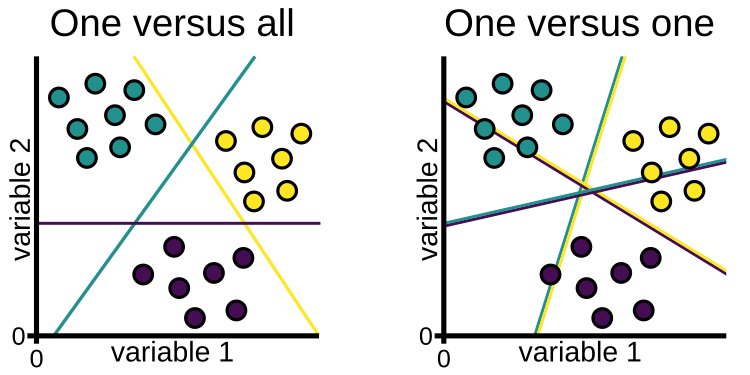

In [ ]:
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [ ]:
print(test_target)

['Perch' 'Smelt' 'Pike' 'Whitefish' 'Perch' 'Bream' 'Smelt' 'Roach'
 'Perch' 'Pike' 'Bream' 'Whitefish' 'Bream' 'Parkki' 'Bream' 'Bream'
 'Perch' 'Perch' 'Perch' 'Bream' 'Smelt' 'Bream' 'Bream' 'Bream' 'Bream'
 'Perch' 'Perch' 'Whitefish' 'Smelt' 'Smelt' 'Pike' 'Perch' 'Perch' 'Pike'
 'Bream' 'Perch' 'Roach' 'Roach' 'Parkki' 'Perch']


In [ ]:
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [ ]:
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [ ]:
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [ ]:
print(lr.coef_, lr.intercept_)

[[-1.49002087 -1.02912886  2.59345551  7.70357682 -1.2007011 ]
 [ 0.19618235 -2.01068181 -3.77976834  6.50491489 -1.99482722]
 [ 3.56279745  6.34357182 -8.48971143 -5.75757348  3.79307308]
 [-0.10458098  3.60319431  3.93067812 -3.61736674 -1.75069691]
 [-1.40061442 -6.07503434  5.25969314 -0.87220069  1.86043659]
 [-1.38526214  1.49214574  1.39226167 -5.67734118 -4.40097523]
 [ 0.62149861 -2.32406685 -0.90660867  1.71599038  3.6936908 ]] [-0.09205179 -0.26290885  3.25101327 -0.14742956  2.65498283 -6.78782948
  1.38422358]


In [ ]:
decisions = lr.decision_function(test_scaled[:5])
print(np.round(decisions, decimals=2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


## 소프트맥스 함수
# $$\sigma(z_i) = \frac{e^{z_{i}}}{\sum_{j=1}^K e^{z_{j}}} \ \ \ for\ i=1,2,\dots,K
$$

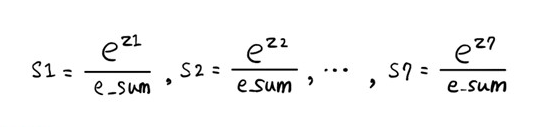

In [ ]:
from scipy.special import softmax
proba = softmax(decisions, axis=1)
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
